# Dataset preparation

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from tqdm import tqdm
from collections import OrderedDict

WIND_VALUES = 'SITU'
DATASET     = 'W1M3A'
PATH_DATA   = os.path.join(os.getcwd(), 'data', DATASET)
PATH_DROP   = os.path.join(PATH_DATA, 'CompleteSeries')
PATH_PLOTS  = os.path.join(os.getcwd(), 'plots')

In [2]:
filename = os.path.join(PATH_DROP, 'source', 'df_dataset_{}.pkl'.format(WIND_VALUES))
df_dataset = pickle.load(open(filename, 'rb'))

DATA_LOSSES = list()

In [3]:
deltas = {}
for i in tqdm(range(df_dataset.__len__() - 1)):
    date_curr = df_dataset.iloc[i]['timestamp']
    date_next = df_dataset.iloc[i+1]['timestamp']
    difference = np.int32( (date_next - date_curr) / pd.Timedelta('1 hour') )
    deltas_keys = list(deltas.keys())
    if difference in deltas_keys:
        deltas[difference] += 1
    else:
        deltas.update({difference : 1})
    #end
#end

deltas = OrderedDict(sorted(deltas.items()))
freq = np.array(list(deltas.items()))
freq

100%|███████████████████████████████████| 70959/70959 [00:16<00:00, 4422.09it/s]


array([[    1, 70822],
       [   12,    26],
       [   23,     8],
       [   24,    48],
       [   25,     1],
       [   36,    12],
       [   78,     1],
       [   84,    23],
       [   85,     5],
       [  108,     8],
       [  121,     2],
       [  132,     1],
       [  144,     1],
       [ 2449,     1]])

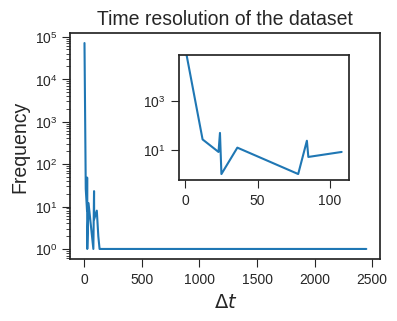

In [4]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 100)
ax.plot(freq[:,0], freq[:,1])
ax.set_yscale('log')
ax.set_xlabel(r'$\Delta t$', fontsize = 14)
ax.set_ylabel(r'Frequency', fontsize = 14)
ax.set_title('Time resolution of the dataset', fontsize = 14)

sax = ax.inset_axes([0.35, 0.35, 0.55, 0.55])
sax.plot(freq[:10,0], freq[:10,1])
sax.set_yscale('log')
sax.set_ylim(top = freq[0,1])
fig.savefig(os.path.join(os.getcwd(), 'plots', 'time_res_dataset_situ.pdf'), 
            format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show(fig)

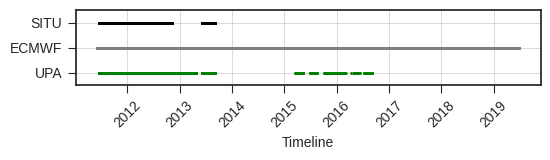

In [5]:
def plot_time_location(df_done, title = None):
    
    plot_indices = df_done['timestamp']
    dfplot       = df_done.copy()
    
    dfplot.at[dfplot['UPA_idx'].notna(), 'UPA_idx']     = 1
    dfplot.at[dfplot['ECMWF_idx'].notna(), 'ECMWF_idx'] = 2
    dfplot.at[dfplot['SITU_idx'].notna(), 'SITU_idx']   = 3
    
    plotUPA   = dfplot['UPA_idx'].values
    plotECMWF = dfplot['ECMWF_idx'].values
    plotSITU  = dfplot['SITU_idx'].values
    
    fig, ax = plt.subplots(figsize = (6,1), dpi = 100)
    ax.plot(plot_indices, plotUPA, 'g+', markersize = 1, alpha = 0.75)
    ax.plot(plot_indices, plotECMWF, c = 'gray', linestyle = 'None', marker = '+', markersize = 1, alpha = 0.75)
    ax.plot(plot_indices, plotSITU, 'k+', markersize = 1, alpha = 0.75)
    ax.set_xlabel('Timeline', fontsize = 10)
    
    if WIND_VALUES == 'SITU':
        for label in ax.get_xmajorticklabels():
            label.set_rotation(45)
        #end
    #end
    
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(['UPA', 'ECMWF', 'SITU'], fontsize = 10)
    ax.grid(axis = 'both', lw = 0.5)
    ax.set_ylim([0.5,3.5])
    
    if title is not None:
        fig.savefig(os.path.join(PATH_PLOTS, title), format = 'pdf', dpi = 300, bbox_inches = 'tight')
    #end
    plt.show(fig)
    plt.close(fig)
#end

plot_time_location(df_dataset)

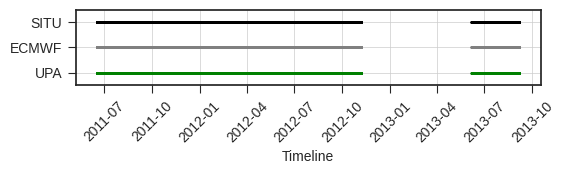

In [12]:
DATA_LOSSES.append(df_dataset.__len__())

mask = (~np.isnan(df_dataset['SITU_idx']))
dataset_frame = df_dataset[mask]
dataset_frame

plot_time_location(dataset_frame, 'time_location_situ.pdf')
DATA_LOSSES.append(dataset_frame.__len__())

In [7]:
deltas = {}
for i in tqdm(range(dataset_frame.__len__() - 1)):
    date_curr = dataset_frame.iloc[i]['timestamp']
    date_next = dataset_frame.iloc[i+1]['timestamp']
    difference = np.int32( (date_next - date_curr) / pd.Timedelta('1 hour') )
    deltas_keys = list(deltas.keys())
    if difference in deltas_keys:
        deltas[difference] += 1
    else:
        deltas.update({difference : 1})
    #end
#end

deltas = OrderedDict(sorted(deltas.items()))
freq = np.array(list(deltas.items()))
freq

100%|███████████████████████████████████| 14319/14319 [00:03<00:00, 3907.00it/s]


array([[    1, 14310],
       [    2,     1],
       [    3,     1],
       [    5,     2],
       [    7,     2],
       [   24,     1],
       [   48,     1],
       [ 5095,     1]])

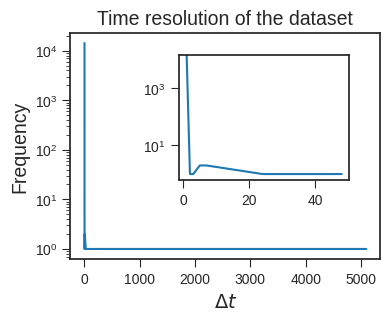

In [8]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 100)
ax.plot(freq[:,0], freq[:,1])
ax.set_yscale('log')
ax.set_xlabel(r'$\Delta t$', fontsize = 14)
ax.set_ylabel(r'Frequency', fontsize = 14)
ax.set_title('Time resolution of the dataset', fontsize = 14)

sax = ax.inset_axes([0.35, 0.35, 0.55, 0.55])
sax.plot(freq[:-1,0], freq[:-1,1])
sax.set_yscale('log')
sax.set_ylim(top = freq[0,1])
fig.savefig(os.path.join(os.getcwd(), 'plots', 'time_res_dataset_situ_cut1.pdf'), 
            format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show(fig)

In [9]:
dates = pd.date_range(dataset_frame['timestamp'].min(), dataset_frame['timestamp'].max())
dates = [date.date() for date in dates]

In [15]:
print(dataset_frame.shape)
df = dataset_frame.copy()

(14320, 7)


In [16]:
for date in tqdm(dates):
    date_init = pd.to_datetime(date)
    date_end = date_init + pd.Timedelta(hours = 23)
    mask = (df['timestamp'] >= date_init) & (df['timestamp'] <= date_end) 
    fdf = df.loc[mask]
    if fdf.__len__() < 24:
        df = df[~mask]
    #end
#end
DATA_LOSSES.append(df.__len__())

100%|███████████████████████████████████████| 813/813 [00:00<00:00, 1257.73it/s]


In [12]:
deltas = {}
for i in tqdm(range(df.__len__() - 1)):
    date_curr = df.iloc[i]['timestamp']
    date_next = df.iloc[i+1]['timestamp']
    difference = np.int32( (date_next - date_curr) / pd.Timedelta('1 hour') )
    deltas_keys = list(deltas.keys())
    if difference in deltas_keys:
        deltas[difference] += 1
    else:
        deltas.update({difference : 1})
    #end
#end

deltas = OrderedDict(sorted(deltas.items()))
freq = np.array(list(deltas.items()))
freq

100%|███████████████████████████████████| 14087/14087 [00:03<00:00, 4363.66it/s]


array([[    1, 14078],
       [   25,     6],
       [   49,     1],
       [   73,     1],
       [ 5113,     1]])

In [85]:
(freq[:,0] - 1) / 24

array([  0.,   1.,   2.,   3., 213.])

In [17]:
DATA_LOSSES

[70960, 14320, 14088, 14088]

In [26]:
def get_loss_percentage(Nprev, Ncurr):
    
    difference = Nprev - Ncurr
    perc = (100 * difference) / Nprev
    return perc
#end

print(f'First cut,  loss = {get_loss_percentage(DATA_LOSSES[0], DATA_LOSSES[1]):2.2f} %')
print(f'Second cut, loss = {get_loss_percentage(DATA_LOSSES[1], DATA_LOSSES[2]):2.2f} %')

First cut,  loss = 79.82 %
Second cut, loss = 1.62 %


_____
# Wind autocorrelation

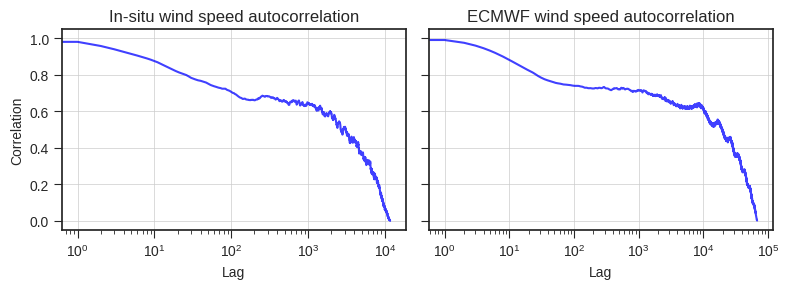

In [28]:
# WIND AUTOCORRELATION
from scipy import signal

fig, ax = plt.subplots(1,2, sharey = True, figsize = (8,3), dpi = 100)

wind_file = os.path.join(PATH_DROP, 'source', f'wind_train_SITU.pkl')
wind = pickle.load(open(wind_file, 'rb'))
wind = np.array(wind).reshape(-1,1)
acorr_wind = signal.correlate(wind, wind, mode = 'full')
lags_wind = signal.correlation_lags(wind.__len__(), wind.__len__())
acorr_wind = acorr_wind / np.max(acorr_wind)
ax[0].plot(lags_wind, acorr_wind, 'b-', lw = 1.5, alpha = 0.75)
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Correlation')
ax[0].set_yscale('linear'); ax[0].set_xscale('log')
ax[0].grid(axis = 'both', lw = 0.5)
ax[0].set_title('In-situ wind speed autocorrelation')

wind_file = os.path.join(PATH_DROP, 'source', f'wind_train_ECMWF.pkl')
wind = pickle.load(open(wind_file, 'rb'))
wind = np.array(wind).reshape(-1,1)
acorr_wind = signal.correlate(wind, wind, mode = 'full')
lags_wind = signal.correlation_lags(wind.__len__(), wind.__len__())
acorr_wind = acorr_wind / np.max(acorr_wind)
ax[1].plot(lags_wind, acorr_wind, 'b-', lw = 1.5, alpha = 0.75)
ax[1].set_xlabel('Lag')
ax[1].set_yscale('linear'); ax[1].set_xscale('log')
ax[1].grid(axis = 'both', lw = 0.5)
ax[1].set_title('ECMWF wind speed autocorrelation')

fig.tight_layout()
fig.savefig(os.path.join(os.getcwd(), 'plots', 'acorr_wind.pdf'), 
            format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show(fig)

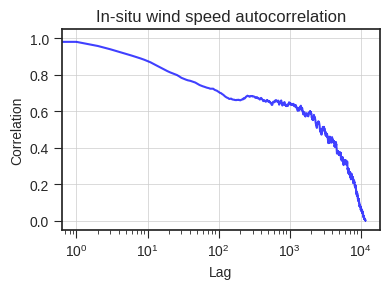

In [30]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 100)

wind_file = os.path.join(PATH_DROP, 'source', f'wind_train_SITU.pkl')
wind = pickle.load(open(wind_file, 'rb'))
wind = np.array(wind).reshape(-1,1)
acorr_wind = signal.correlate(wind, wind, mode = 'full')
lags_wind = signal.correlation_lags(wind.__len__(), wind.__len__())
acorr_wind = acorr_wind / np.max(acorr_wind)
ax.plot(lags_wind, acorr_wind, 'b-', lw = 1.5, alpha = 0.75)
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
ax.set_yscale('linear'); ax.set_xscale('log')
ax.grid(axis = 'both', lw = 0.5)
ax.set_title('In-situ wind speed autocorrelation')

fig.tight_layout()
fig.savefig(os.path.join(os.getcwd(), 'plots', 'acorr_wind_situ.pdf'), 
            format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show(fig)

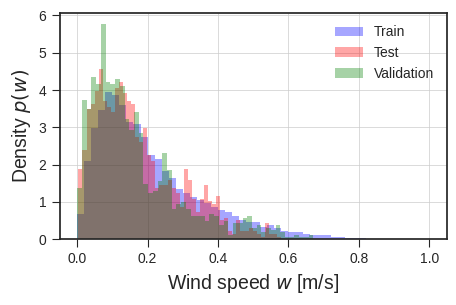

In [16]:
wind_file = os.path.join(PATH_DROP, 'source', f'wind_train_SITU.pkl')
wind_train = pickle.load(open(wind_file, 'rb'))
wind_train = np.array(wind_train)

wind_file = os.path.join(PATH_DROP, 'source', f'wind_test_SITU.pkl')
wind_test = pickle.load(open(wind_file, 'rb'))
wind_test = np.array(wind_test)

wind_file = os.path.join(PATH_DROP, 'source', f'wind_val_SITU.pkl')
wind_val = pickle.load(open(wind_file, 'rb'))
wind_val = np.array(wind_val)

fig, ax = plt.subplots(figsize = (5,3), dpi = 100)
ax.hist(wind_train, bins = 50, density = True, fc = 'blue', alpha = 0.35, label = 'Train')
ax.hist(wind_test,  bins = 50, density = True, fc = 'r', alpha = 0.35, label = 'Test')
ax.hist(wind_val,   bins = 50, density = True, fc = 'g', alpha = 0.35, label = 'Validation')
ax.set_xlabel(r'Wind speed $w$ [m/s]', fontsize = 14)
ax.set_ylabel(r'Density $p(w)$', fontsize = 14)
ax.legend()
ax.grid(lw = 0.5, axis = 'both')
fig.savefig(os.path.join(os.getcwd(), 'plots', 'wind_densities.pdf'), format = 'pdf',
           dpi = 300, bbox_inches = 'tight')
plt.show()